
# Euler's method for ODEs


We are interested in the numerical solution of the initial value problem (IVP) for an ordinary differential equation:

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y), \quad a \le t \le b, \quad y(a) = y_1.$$

The idea is to start from $t = a$ (since we know $y(a)$), increment $t$
by sufficiently small integration step $h$, and use the differential equation
to determine $y(t + h)$. The process is then repeated until we reach
$t = b$.

### Notations


We denote the value of independent variable at the $i$th integration
step by $t_{i+1}$, $i = 1, 2, \ldots$, $t_1 = a$, the computed
solution at the $i$th step by $y_{i+1}$,

$$y_{i+1} \equiv y(t_{i+1}) , \quad i = 1, \ldots, n-1;$$

the value of the right hand side of the differential equation at the $i$th
integration step by $f_{i+1}$,

$$f_{i+1} \equiv f(t_{i+1}, y_{i+1}) .$$

The step size $h$ (assumed to be a constant for the sake of
simplicity) is:

$$h = t_i - t_{i-1} = \frac{b - a}{n - 1} .$$


## The method for a first-order ordinary differential equation

The Taylor series expansion of $y(t_{j+1})$ about $t_j$ correct up to
the $h^2$ term is as following,

$$y(t_{j+1}) = y(t_j + h) =
  y(t_j) + h \left.\frac{\mathrm{d}y}{\mathrm{d}t}\right|_{t_j} 
  + \frac{h^2}{2} \left.\frac{\mathrm{d}^2y}{\mathrm{d}t^2}\right|_{t_j} 
  + O(h^3).$$

Using the differential equation for $\frac{\mathrm{dy}}{\mathrm{d}t}$,

$$y(t_{j+1}) =   y(t_j) + h \, f(t_j, y_j) + \alpha h^2 + O(h^3),$$

or

$$y_{j+1} = y_j + h f_j +  \alpha h^2 + O(h^3).$$

Ignoring the quadratic and higher order terms, we obtain the
expression for Euler's integration step:

$$y_{j+1} = y_j + h f_j .$$

In addition to deriving the expression for *Euler's integration step*, we learned that the leading
error term is quadratic in $h$.


## Implementation

In [1]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a, b, n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[i])
        y[i+1] = y[i] + k1
    end
    return t, y
end

myeulers


## Example

$$
\frac{\mathrm{d}y}{\mathrm{d}t} = e^{-\sin(t)} - y \cos(t), \qquad 0 \le t \le 5, \qquad y(0) = 0 \; .
$$
The exact solution is
$$
y_{\mathrm{exact}}(t) = t \, e^{-\sin(t)} \;.
$$

In [2]:

a = 0.0
b = 5.0
fun(t, y) = exp(-sin(t)) - y * cos(t)
y1 = 0.0;

In [4]:

yexact(t) = t * exp(-sin(t))

yexact (generic function with 1 method)

In [5]:

using PyPlot

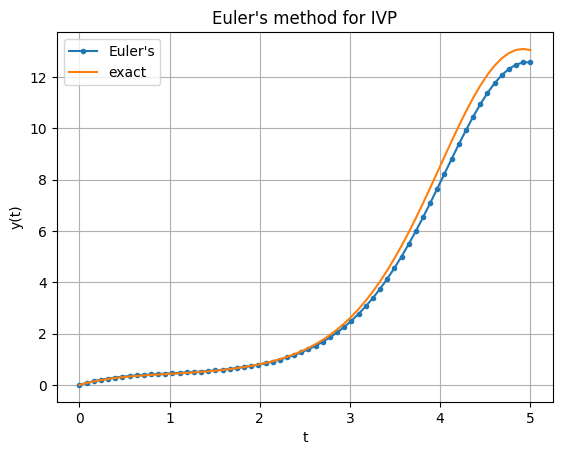

In [6]:

n = 64
t, y = myeulers(fun, a, b, n, y1)
plot(t, y, label="Euler's", marker=".")
plot(t, yexact.(t), label="exact")
grid(true)
legend()
xlabel("t")
ylabel("y(t)")
title("Euler's method for IVP");


## Global error of Euler's method

In [8]:

ndp = 9
err = zeros(ndp)
hs = zeros(ndp)
ycheck = yexact(b);

In [9]:

for l = 1:ndp
    n = 2^(l+3)
    _, y = myeulers(fun, a, b, n, y1)
    err[l] = abs(ycheck - y[end])
    hs[l] = (b - a)/(n - 1)
end

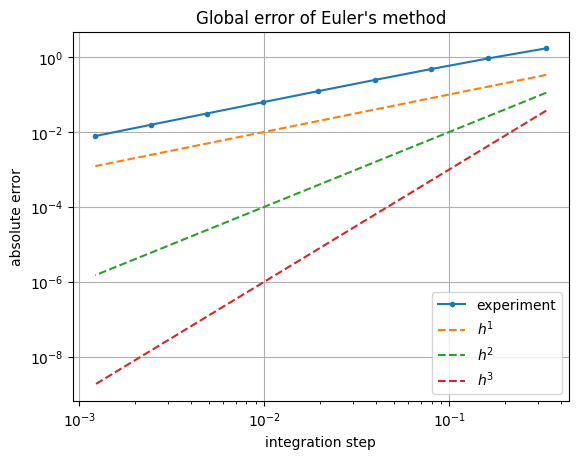

In [10]:

loglog(hs, err, ".-", label="experiment")
loglog(hs, hs .^ 1, "--", label=L"h^1")
loglog(hs, hs .^ 2, "--", label=L"h^2")
loglog(hs, hs .^ 3, "--", label=L"h^3")
grid(true)
legend()
xlabel("integration step")
ylabel("absolute error")
title("Global error of Euler's method");

## Converting higher order ODEs to systems of first order ordinary differential equations


As an introductory example, let's consider an initial value problem for a second order ODE:

$$\frac{\mathrm{d}^2 y}{\mathrm{d} t^2} = f(t, y, \frac{\mathrm{d} y}{\mathrm{d} t}), \quad a \le t \le b, \quad y(a) = y_a, \quad
\frac{\mathrm{d} y}{\mathrm{d} t} (a) = y'_a.$$ 

We change the dependent variables:

$$y_1 = y, \quad y_2 = \frac{\mathrm{d} y}{\mathrm{d} t}$$

Then,

$$\frac{\mathrm{d} y_1}{\mathrm{d} t} = y_2,$$

and

$$\frac{\mathrm{d} y_2}{\mathrm{d} t} = \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = f(t, y, \frac{\mathrm{d} y}{\mathrm{d} t}) = f(t, y_1, y_2).$$

The last two equations for a system of two first order differential equations:
$$\frac{\mathrm{d} y_1}{\mathrm{d} t} = y_2,$$
$$\frac{\mathrm{d} y_2}{\mathrm{d} t} = f(t, y_1, y_2).$$

The initial conditions for the system are as follows:

$$y_1(a) = y_a, \quad y_2(a) = y'_a.$$

## Euler's method for a system of first order ODEs.

Let's introduce vector notations:

$$Y = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, \quad F(t, Y) = \begin{pmatrix} y_2 \\ f(t, y_1, y_2) \end{pmatrix}.$$

Then the system of equations can be written in a compact vector form:

$$\frac{\mathrm{d} Y}{\mathrm{d} t} = F(t, Y).$$

## Examples

In [7]:

"""
    t, y = myeulersv(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
    neqs = length(y1)
    y = zeros(neqs, n)
    h = t[2] - t[1]
    y[:, 1] .= y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] .= y[:, i] .+ k1
    end
    return t, y
end

myeulersv


## Example

Consider the motion of harmonic oscillator with unit frequency:

$$\frac{\mathrm{d}^2 y}{\mathrm{d} t^2} = - y.$$

In vector notations,

$$Y = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, \quad F(t, Y) = \begin{pmatrix} y_2 \\ -y_1 \end{pmatrix}.$$

In [11]:

a = 0.0
b = 10.0
n = 1000
y1 = [1.0, 0.0];

In [12]:

fun(t, y) = [y[2], -y[1]]

fun (generic function with 1 method)

In [13]:

t, y = myeulersv(fun, a, b, n, y1)

(0.0:0.01001001001001001:10.0, [1.0 1.0 … -0.8879577631420184 -0.8823245524624813; 0.0 -0.01001001001001001 … 0.5627577468857546 0.5716462129832723])

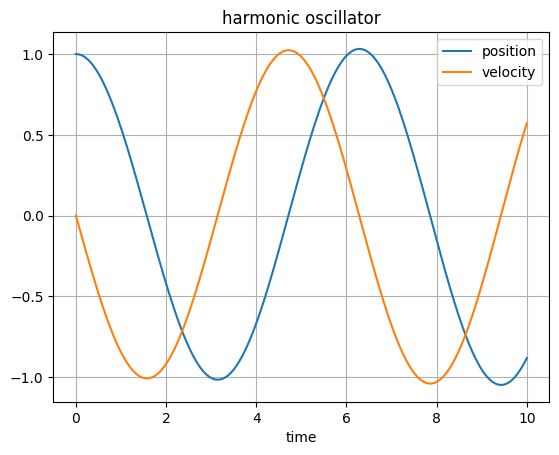

In [14]:

plot(t, y[1, :], label="position")
plot(t, y[2, :], label="velocity")
grid(true)
legend()
title("harmonic oscillator")
xlabel("time");